In [1]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
#from keras import backend as K

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16



Using TensorFlow backend.


In [2]:

import sys
import SimpleITK as sitk
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline 
import numpy as np
import os
import fnmatch
import shutil
from ipywidgets import interact, fixed
import pandas as pd
import warnings
from skimage import exposure
from skimage import data
from skimage.transform import rotate
import _pickle as cPickle
import random



def myshow(image_arr,slice_n):
    plt.imshow(image_arr[slice_n,:,:],cmap='gray')
    plt.show()

In [6]:
df=pd.read_pickle('e://Image Processing/Brats Project/resized_pickle.pkl')

In [12]:
#getting arrays from columns 
def get_arrays(data, column=['pseudo', 'seg']):
    
    x= np.array([i for i in data[column[0]]]) #array of images
    y=np.array([i for i in data[column[1]]])#array for labels
    
    return x,y 



train, test = train_test_split(df, test_size=0.25)

x_train, y_train = get_arrays(train)
x_test, y_test = get_arrays(test)


In [69]:
#function construct array of images  and labels
def go_and_construct_array(data, size_x, size_y, col=['pseudo', 'seg']):
    
    x=np.empty(size_x)
    y=np.empty(size_y)
    counter_x=0 #use this for indexing of future array
    counter_y=0
    
    for index, volume in enumerate(data.loc[:, col[0]]):
        for i, sl in enumerate(volume):
        
            x[counter_x] = sl
            counter_x += 1 
            #print('{} {} out of {} DONE!'.format(col[0], counter_x, 285*130))
            
    for index, volume in enumerate(data.loc[:, col[1]]):
        for i, sl in enumerate(volume):
            y[counter_y]=sl
            counter_y += 1
            #print('{} {} out of {} DONE!'.format(col[1], counter_y, 285*130))
    return x,y #returning two arrays x with images and y with labels 
            

In [70]:
#first of all lets divide our dataframe for training and test set. 
#we`ll also need test dataset for validation purposes

train, test = train_test_split(df, test_size=0.20)

x_train, y_train = go_and_construct_array(train, size_x=(len(train)*130, 120, 120, 3), size_y=(len(train)*130, 120, 120))

x_test, y_test = go_and_construct_array(test, size_x=(len(test)*130, 120,120,3), size_y=(len(test)*130, 120, 120))

In [ ]:
Y=np_utils.to_categorical(y_train, num_classes)

In [131]:
np.unique(y_train)

array([0.        , 0.00098039, 0.00196078, 0.00294118, 0.00392157,
       0.00490196, 0.00588235, 0.00686275, 0.00784314, 0.00882353,
       0.00980392, 0.01078431, 0.01176471, 0.0127451 , 0.01372549,
       0.01470588, 0.01568627])

In [119]:
y_train.astype('uint8')

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

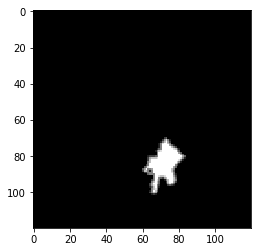

In [129]:
plt.imshow(y_train[60], cmap='gray')

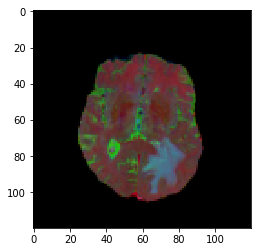

In [130]:
plt.imshow(x_train[60])